In [40]:
import numpy as np 
import pandas as pd
from os.path import join as os_join

In [41]:
data_path = '/Users/xingzhiguo/Documents/git_project/NN-verification/data'
df_two_year = pd.read_csv(os_join(data_path, 'compas-scores-two-years-violent.csv'))
#compas-scores-two-years-violent
print (df_two_year.columns)
selected_cols = [ "age", "c_charge_degree", "race", "age_cat", "score_text", "sex", "priors_count", 
                    "days_b_screening_arrest", "decile_score", "is_recid", "two_year_recid", "c_jail_in", "c_jail_out"]
df_two_year = df_two_year.loc[:,selected_cols ]
df_two_year = df_two_year[  (df_two_year['days_b_screening_arrest']<=30) &
                            (df_two_year['days_b_screening_arrest']>=-30) &
                            (df_two_year['is_recid']!= -1) &
                            (df_two_year['c_charge_degree'] != 'O') &
                            (df_two_year['score_text'] != 'N/A') 
                            ]


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'two_year_recid.1'],
      dtype='object')


In [29]:
df_two_year

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,c_jail_in,c_jail_out
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,2013-01-26 03:45:27,2013-02-05 05:36:53
4,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,2013-11-30 04:50:18,2013-12-01 12:28:56
5,43,F,Other,25 - 45,Low,Male,3,-1.0,4,0,0,2013-08-29 08:55:23,2013-08-30 08:42:13
6,39,M,Caucasian,25 - 45,Low,Female,0,-1.0,1,0,0,2014-03-15 05:35:34,2014-03-18 04:28:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,20,F,African-American,Less than 25,High,Male,0,-1.0,9,0,0,2013-10-19 11:17:15,2013-10-20 08:13:06
4739,23,F,African-American,Less than 25,Medium,Male,0,-1.0,7,0,0,2013-11-22 05:18:27,2013-11-24 02:59:20
4740,23,F,African-American,Less than 25,Low,Male,0,-1.0,3,0,0,2014-01-31 07:13:54,2014-02-02 04:03:52
4741,57,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,2014-01-13 05:48:01,2014-01-14 07:49:46


<AxesSubplot:>

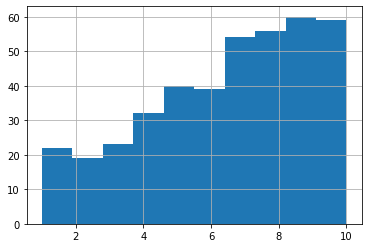

In [37]:
df_two_year[ (df_two_year['race']=='African-American') & (df_two_year['two_year_recid']==1) ].loc[:,"decile_score"].hist()
# df_two_year[ (df_two_year['race']=='African-American') ].loc[:,"decile_score"].hist()


<AxesSubplot:>

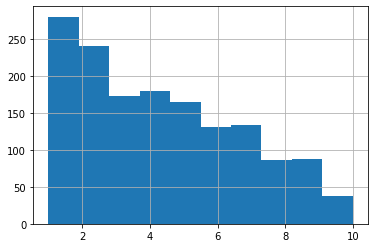

In [38]:
df_two_year[ (df_two_year['race']=='African-American') & (df_two_year['two_year_recid']==0) ].loc[:,"decile_score"].hist()


<AxesSubplot:>

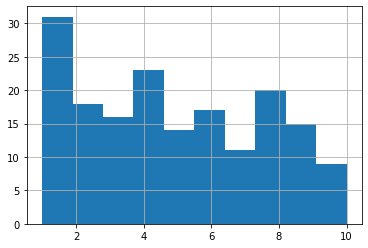

In [35]:
df_two_year[ (df_two_year['race']=='Caucasian') & (df_two_year['two_year_recid']==1) ].loc[:,"decile_score"].hist()


<AxesSubplot:>

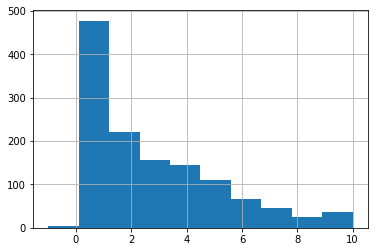

In [39]:
df_two_year[ (df_two_year['race']=='Caucasian') & (df_two_year['two_year_recid']==0) ].loc[:,"decile_score"].hist()


In [76]:
df_two_year['decile_score'].value_counts()

 1     1071
 2      608
 3      449
 4      438
 5      364
 6      282
 7      267
 9      202
 8      199
 10     135
-1        5
Name: decile_score, dtype: int64

In [44]:
import torch 

In [46]:
torch.randn(3, requires_grad=True)

tensor([-1.0280,  1.0784,  1.7306], requires_grad=True)

In [72]:
np.hstack([torch.empty(3).random_(2).numpy(), torch.empty(6).random_(2).numpy(), torch.empty(2).random_(2).numpy()])

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

In [84]:
RS = np.random.RandomState(seed=0)
RS.rand(10,2)
RS.randint(0,2, (10))

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])